# Segundo examen parcial 
## Equipo 4
- Elsy Camila Silva Velázquez
- Luis Octavio Sánchez Hatadi 
- Guillermo Gerardo Andrés Urbano



# Programa 1

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import time

In [ ]:
A = np.random.randint(0, 30, size=(5000,5000))
B = np.random.randint(0,30, size= (5000,5000))

In [ ]:
print('Matriz A:\n',A)

print('Matriz B:\n',B)

Matriz A:
 [[29 12 28 ... 26  8 24]
 [ 6 19 24 ...  0 16  2]
 [22 26 16 ... 17  2 21]
 ...
 [ 5 24 25 ... 28  9  1]
 [15 12  4 ...  6 16 15]
 [15 28 28 ... 29  5 29]]
Matriz B:
 [[ 5  6 24 ... 19 26  0]
 [ 2 13 12 ... 25 12 18]
 [23 20  8 ... 28 19  4]
 ...
 [13 18 29 ...  9  8 23]
 [22  9 11 ... 20 20 16]
 [10 24 17 ... 23  8 28]]


## Secuencial

In [ ]:
def multiplicacion_matricial_secuencial(A, B):
    new_m = np.dot(A,B)
    return new_m    

In [ ]:
t = time.time()
new_m=multiplicacion_matricial_secuencial(A, B)
print(new_m)
tiempo_secuencial = time.time()-t
print('Tiempo secuencial:', tiempo_secuencial)

[[1075830 1066766 1079420 ... 1042065 1074399 1054926]
 [1070732 1058314 1078861 ... 1047688 1063943 1052001]
 [1071630 1064138 1080449 ... 1050506 1068866 1062557]
 ...
 [1076380 1065652 1075092 ... 1057603 1067051 1044529]
 [1063932 1045213 1068226 ... 1025253 1050007 1039121]
 [1071048 1044496 1058895 ... 1037512 1053849 1045970]]
Tiempo secuencial: 310.50049114227295


## Concurrente


In [ ]:
import threading as th

lock = th.Lock()

def multiplicacion_matricial_hilos(A, B, C):        
    
    lock.acquire() # deshabilitar
    aux = np.dot(A, B).copy()
    C.append(aux)
    lock.release() # habilitar

In [ ]:
def obtener_divisores(num_renglones):
    divisores = []
    i = 2
    for _ in range(num_renglones+1):
        if num_renglones % i == 0:
            divisores.append(i)
        i += 1
    return divisores

In [ ]:
num_hilos = obtener_divisores(A.shape[0])[0:5]
print(num_hilos)

[2, 4, 5, 8, 10]


In [ ]:
lista_tiempos = []

for hilos in num_hilos:
    print('hilos', hilos)
    
    lista_hilos = []
    result = []
    # Esto funciona porque sabemos que lo divide exactamente.
    desp = A.shape[0] // hilos 
    end = desp
    inicio = 0
    for hilo in range(1,hilos+1):                
        lista_hilos.append(th.Thread(target=multiplicacion_matricial_hilos, args=(A[inicio:end,:], B, result)))
        inicio = end
        end += desp         
    
    t = time.time()
    # Arrancar hilos 
    for hilo in lista_hilos:
        hilo.start()

    # Esperar hilos
    for hilo in lista_hilos:
        hilo.join()
    
    lista_tiempos.append(time.time()-t)

#print(result)   
#print('-------------')
print(lista_tiempos)

hilos 2
hilos 4
hilos 5
hilos 8
hilos 10
[309.8181354999542, 309.26260781288147, 309.26171469688416, 309.63249683380127, 308.6194202899933]


# Análisis de rendimiento: speed-up y eficiencia

In [ ]:
tiempos_concurrente = lista_tiempos

In [ ]:
speed_up = []
for tiempo_c in tiempos_concurrente:
    speed_up.append(tiempo_secuencial / tiempo_c)

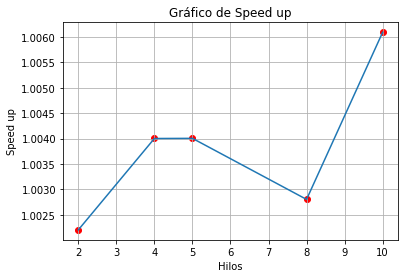

In [ ]:
plt.scatter(num_hilos, speed_up, c='r')
plt.plot(num_hilos, speed_up)
plt.xlabel('Hilos')
plt.ylabel('Speed up')
plt.title('Gráfico de Speed up')
plt.grid()

Recordando que la formula para calcular el Speed up es $S = \frac{T_s}{T_c}$

Para este analisís se usaron $2,4,5,8,10$ y los mejores speed-up fueron para 4 5 y 10, cabe resaltar que no hubo una diferencia sustancial entre usar 4 y 5 hilos. En conclusión para una matriz de $5000\times5000$ se recomienda usar de $10$ hilos; en general el tiempo concurrente es mejor que el tiempo secuencial.

In [ ]:
eficiencia = []
for p, s in zip(num_hilos, speed_up):    
    eficiencia.append(s / p)

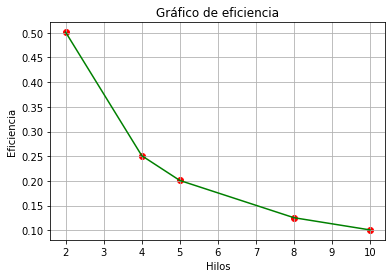

In [ ]:
plt.scatter(num_hilos, eficiencia, c='r')
plt.plot(num_hilos, eficiencia, c='g')
plt.xlabel('Hilos')
plt.ylabel('Eficiencia')
plt.title('Gráfico de eficiencia')
plt.grid()

Recordando que la formula para calcular la eficiencia es $E = \frac{S}{P}$

Vemos que la eficiencia va bajando con forme crece le número de hilos, por lo tanto no es efectivo implementar una cantidad de hilos por tan poco incremento en el speed up y eficiencia.

# Programa 2


### Clase Carrera: 

Define los movimientos de la liebre y de la torutuga de acuerdo a las probabilidades dadas en el planteamiento del problema.

In [3]:
import random
import threading as th
import time


class Carrera: 
  def __init__(self, tortuga, liebre):
    self.tortuga=tortuga
    self.liebre=liebre

  def mov_tortuga(self):
    r= random.randrange(100)
    pasos_tor=[3,-6,1]
    
    if (r <= 50 ):
      self.tortuga= pasos_tor[0]
    
    elif (50<r and  r<= 70):
      self.tortuga= pasos_tor[1]
    
    else: 
      self.tortuga=pasos_tor[2]
    
    return self.tortuga
  
  def mov_liebre(self): 
    r=random.randrange(100)
    pasos_lieb= [0,9,-12,1,-2]

    if (r <= 20):
      self.liebre= pasos_lieb[0]
    
    elif (20 < r and r<= 40): 
      self.liebre= pasos_lieb[1]
    
    elif (40 < r and r<= 50):
      self.liebre=pasos_lieb[2]
    
    elif (50 < r and r <= 80):
      self.liebre=pasos_lieb[3]
    
    else: 
      self.liebre= pasos_lieb[4]
    
    return self.liebre


## Clases Tortuga y Liebre

Son los hilos que realizan las simulación de la carrera. Se establecen los mecanismos de bloqueo y los requerimientos adicionales.

In [4]:
class Tortuga(th.Thread):

  def __init__(self, carrera, pista):
    th.Thread.__init__(self)
    self.carrera= carrera 
    self.pista=pista
  
  def run(self):
    carrera= self.carrera
    pista = self.pista

    print('----- Inicia la carrera -----')
  
    global contador_tortuga
    global contador_liebre
    pista = pista-1
    while( contador_tortuga <= pista and contador_liebre <= pista):
        if contador_tortuga <=0:
          contador_tortuga=0  
        if (contador_tortuga > 0 ):
          print('| T', contador_tortuga)
        
        lock.acquire()
        time.sleep(0.25)
        contador_tortuga += carrera.mov_tortuga()
        lock.release()
          
        if (contador_tortuga > pista and contador_liebre < pista) : 
          print ('-----La tortuga ha ganado -----')
          break

class Liebre(th.Thread):
  def __init__(self, carrera, pista):
    th.Thread.__init__(self)
    self.carrera= carrera 
    self.pista=pista

  def run(self):
    carrera= self.carrera
    pista = self.pista

    global contador_liebre
    global contador_tortuga
    pista= pista -1
    while(contador_liebre <= pista or contador_tortuga <=pista):
        if contador_liebre <=0:
          contador_liebre=0
      
        if (contador_liebre > 0 ):
          print('        | R', contador_liebre)
        
        lock.acquire()
        time.sleep(0.25)
        contador_liebre += carrera.mov_liebre()
        lock.release()

        if (contador_liebre > pista and contador_tortuga < pista):
          print ('-----La liebre ha ganado -----' )
          break
        if (contador_tortuga >= 70):
          break


##  Creación de la simulación:

In [5]:
carrera= Carrera(1,1)
contador_tortuga=0
contador_liebre=0 
lock = th.Lock()

ht=Tortuga(carrera, 70)
hr=Liebre(carrera, 70)

ht.start()
hr.start()

ht.join()
hr.join()


----- Inicia la carrera -----
| T 3
| T 6
| T 9
| T 12
        | R 1
| T 13
        | R 10
| T 16
        | R 19
| T 19
        | R 20
| T 22
        | R 21
| T 23
        | R 21
| T 26
        | R 19
| T 27
        | R 19
| T 30
        | R 17
| T 24
        | R 15
| T 27
        | R 16
| T 28
        | R 14
        | R 2
        | R 3
        | R 3
        | R 4
        | R 2
| T 31
        | R 1
| T 34
        | R 1
| T 28
        | R 1
| T 31
        | R 1
| T 34
        | R 2
| T 35
        | R 3
| T 38
        | R 3
| T 41
        | R 9
| T 44
        | R 7
| T 38
        | R 7
| T 32
        | R 7
| T 35
        | R 8
| T 38
        | R 9
| T 41
        | R 7
| T 42
        | R 8
| T 45
        | R 6
| T 48
        | R 6
| T 49
        | R 4
| T 52
        | R 2
| T 55
        | R 1
| T 56
        | R 9
| T 57
        | R 18
| T 58
        | R 19
| T 61
        | R 19
| T 64
        | R 20
| T 67
        | R 18
-----La tortuga ha ganado -----


# Programa 3

In [6]:
import threading as th
import time
 
# Variables de memoria compartida
n = 10 #Definimos el tamaño del buffer
buffer = [-1 for i in range(n)] 
indice_entrada = 0
indice_salida = 0
 
buffer1 = threading.Semaphore() 
empty = threading.Semaphore(n)
full = threading.Semaphore(0)


def productor():
    global n, buffer, indice_entrada, indice_salida
    global buffer1, empty, full
    producidos = 0 
    contador = 0 
    
    while producidos < 10:
      empty.acquire() 
      buffer1.acquire() 
       
      contador += 1
      buffer[indice_entrada] = contador 
      indice_entrada = (indice_entrada + 1)%n
      print("Añadiendo al buffer...", contador)
       
      buffer1.release() 
      full.release()  
       
      time.sleep(1)       
      producidos += 1
    pass


def consumidor():
    global n, buffer, indice_entrada, indice_salida, contador
    global buffer1, empty, full
     
    consumidos = 0
    
    while consumidos < 10:
      full.acquire()
      buffer1.acquire()
       
      item = buffer[indice_salida]
      indice_salida = (indice_salida + 1)%n
      print("Eliminando del buffer...", item)
       
      buffer1.release()
      empty.release()      
       
      time.sleep(2.5)
       
      consumidos += 1    


productor = th.Thread(target=productor, args=())
consumidor = th.Thread(target=consumidor, args=())
 
# Arrancamos los hilos
consumidor.start()
productor.start()
 
# Esperando a cada hilo
productor.join()
consumidor.join()

Añadiendo al buffer... 1
Eliminando del buffer... 1
Añadiendo al buffer... 2
Añadiendo al buffer... 3
Eliminando del buffer... 2
Añadiendo al buffer... 4
Añadiendo al buffer... 5
Eliminando del buffer... 3
Añadiendo al buffer... 6
Añadiendo al buffer... 7
Añadiendo al buffer... 8
Eliminando del buffer... 4
Añadiendo al buffer... 9
Añadiendo al buffer... 10
Eliminando del buffer... 5
Eliminando del buffer... 6
Eliminando del buffer... 7
Eliminando del buffer... 8
Eliminando del buffer... 9
Eliminando del buffer... 10
